In [108]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Input

In [ ]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0N1AJJ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0N1AJJ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0N1AJJ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
tokenizer = info.features['text'].encoder

In [91]:
buffer_size = 10000
batch_size = 64

train_data, test_data = imdb['train'], imdb['test']

train_dataset = train_data.shuffle(buffer_size=buffer_size)
train_dataset = train_dataset.padded_batch(batch_size=batch_size, padded_shapes=None)
test_dataset = test_data.padded_batch(batch_size=batch_size, padded_shapes=None)

In [119]:
embedding_dim = 16

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.embedding = Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim)
    self.flatten = GlobalAveragePooling1D()
    self.fc1 = Dense(6, activation='relu')
    self.fc2 = Dense(1, activation='sigmoid')

  def call(self, inputs):
    x = self.embedding(inputs)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.fc2(x)
    return x
  
  def model(self):
        x = Input([None])
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [120]:
model = MyModel()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.model().summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_15 (Embedding)     (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 7         
Total params: 131,069
Trainable params: 131,069
Non-trainable params: 0
_________________________________________________________________


In [121]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 8s 20ms/step - loss: 0.6867 - accuracy: 0.5524 - val_loss: 0.6696 - val_accuracy: 0.6627
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 0.6193 - accuracy: 0.7218 - val_loss: 0.5726 - val_accuracy: 0.7424
Epoch 3/10
391/391 [==============================] - 7s 18ms/step - loss: 0.5054 - accuracy: 0.8297 - val_loss: 0.4730 - val_accuracy: 0.8368
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 0.4128 - accuracy: 0.8774 - val_loss: 0.4089 - val_accuracy: 0.8682
Epoch 5/10
391/391 [==============================] - 7s 18ms/step - loss: 0.3503 - accuracy: 0.8935 - val_loss: 0.3763 - val_accuracy: 0.8576
Epoch 6/10
391/391 [==============================] - 7s 18ms/step - loss: 0.3059 - accuracy: 0.9072 - val_loss: 0.3450 - val_accuracy: 0.8781
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 0.2746 - accuracy: 0.9142 - val_loss: 0.3287 - val_accuracy: 0.8783

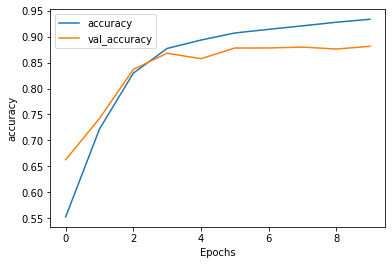

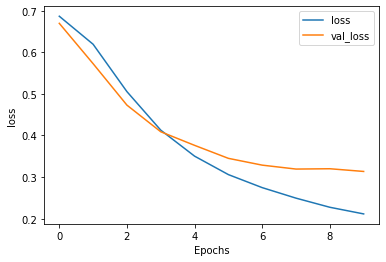

In [122]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")